In [1]:
from moviepy import VideoFileClip

VideoFileClip('hong.gif').write_videofile('hong_test.mp4')

{'video_found': True, 'audio_found': False, 'metadata': {}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [360, 640], 'bitrate': None, 'fps': 33.33, 'codec_name': 'gif', 'profile': None}], 'input_number': 0}], 'duration': 12.27, 'bitrate': 41894, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'gif', 'video_profile': None, 'video_size': [360, 640], 'video_bitrate': None, 'video_fps': 33.33, 'video_duration': 12.27, 'video_n_frames': 408}
/mnt/d/naver_boostcamp/project/level4-cv-finalproject-hackathon-cv-19-lv3/.venv/lib/python3.10/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux64-v4.2.2 -i hong.gif -loglevel error -f image2pipe -vf scale=360:640 -sws_flags bicubic -pix_fmt rgb24 -vcodec rawvideo -
MoviePy - Building video hong_test.mp4.
MoviePy - Writing video hong_test.mp4



MoviePy - Done !
MoviePy - video ready hong_test.mp4


# video generation test

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt


# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
# Setting up the Pose model for videos.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
mp_drawing = mp.solutions.drawing_utils


def estimPose_img(input_file, pose=pose_img, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                   thickness=20, circle_r=10, display=True):
    
    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file
    
    # Create a copy of the input image
    output_img = input_img.copy()
    
    # Perform the Pose Detection.
    results = pose.process(output_img) # 이거 이렇게 하면 트래킹은 안되자나..
    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
        skeleton = np.zeros_like(input_img)
        mp_drawing.draw_landmarks(skeleton, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_world_landmarks.landmark:
            landmarks.append((landmark.x, landmark.y,
                                  landmark.z, landmark.visibility))
            
    # print(results.pose_landmarks)
    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('off')
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('off')
        
        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        return output_img, skeleton, landmarks
        
    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, skeleton, landmarks

def estimPose_video(input_file, pose_video=pose_video, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                 thickness=1, circle_r=1, nrows_frames=4, ncols_frames=3):
    
    # Initialize the VideoCapture object to read from a video stored in the disk.
    video = cv2.VideoCapture(input_file)
    
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(video.get(cv2.CAP_PROP_FPS))
    frames = []
    original_video_frames = []
    only_skeleton_frames = []
    
    all_landmarks = []
    for i in range(total_frames):
        # Read a frame.
        ok, frame = video.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        original_video_frames.append(frame.copy())
    
        # Check if frame is not read properly.
        if not ok:
            # Break the loop.
            break
        
        # Get the width and height of the frame
        frame_height, frame_width, _ =  frame.shape
        # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        frame, skeleton, landmarks = estimPose_img(frame, pose_video, landmarks_c, connection_c, thickness, 
                              circle_r, display=False)
        frames.append(frame)
        all_landmarks.append(landmarks)
        only_skeleton_frames.append(skeleton)
    return original_video_frames, only_skeleton_frames, frames, all_landmarks

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1737042044.078205   27678 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737042044.079003   27673 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737042044.157387   27679 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737042044.159680   27673 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [2]:
original_video_frames, only_skeleton_frames, frames, _ = estimPose_video("../hong.mp4", thickness=5)

W0000 00:00:1737042047.055806   27678 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [3]:
len(frames)

409

In [4]:
H, W, C = frames[0].shape
fps = 30
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (W, H))

for frame in frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

out.release()

In [4]:
import imageio.v3 as iio

output_path = "test.mp4"
iio.imwrite(output_path, frames, fps=30)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (360, 640) to (368, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x34b6bbc0] Warning: data is not aligned! This can lead to a speed loss


# image similarity

In [5]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

I0000 00:00:1737093014.090667   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1737093014.699616   60109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093015.397268   60109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093015.728568   60107 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


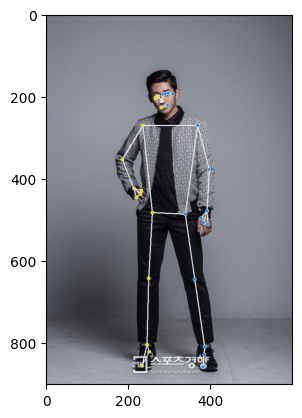

In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import cv2

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

def get_detection(img_path):
    base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
    detection_result = detector.detect(mp_image)
    annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)
    plt.imshow(annotated_image)
    plt.show()
    
    return detection_result.pose_landmarks, detection_result.segmentation_masks, annotated_image
r, s, a = get_detection('../target_img.jpg')

In [2]:
import numpy as np

def get_area(segmentation_masks, thr=0.5):
    return np.sqrt(np.sum(segmentation_masks.numpy_view() > thr))

def refine_landmarks(landmarks):
    lst = []
    for landmark in landmarks:
        lst.append([landmark.x, landmark.y, landmark.z, landmark.visibility])
    return np.array(lst)

I0000 00:00:1737093016.106103   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737093016.603097   60140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093017.277196   60140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


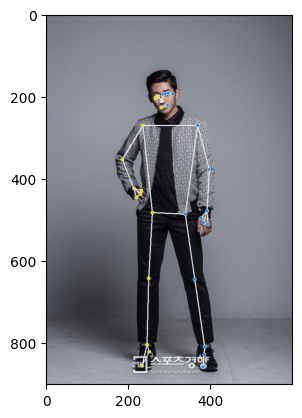

I0000 00:00:1737093017.563871   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737093017.988116   60152 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093018.535380   60154 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


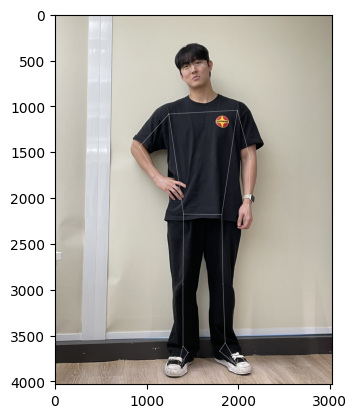

I0000 00:00:1737093019.519406   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737093020.337021   60179 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093021.075533   60178 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


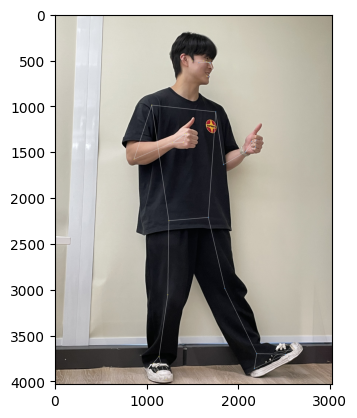

In [3]:
target_landmarks, target_masks, target_annotated_image = get_detection("../target_img.jpg")
target_landmarks_np = refine_landmarks(target_landmarks[0])
target_area = get_area(target_masks[0])

right_landmarks, right_masks, right_annotated_image = get_detection("../right_pose_img.jpg")
right_landmarks_np = refine_landmarks(right_landmarks[0])
right_area = get_area(right_masks[0])

wrong_landmarks, wrong_masks, wrong_annotated_image = get_detection("../wrong_pose_img.jpg")
wrong_landmarks_np = refine_landmarks(wrong_landmarks[0])
wrong_area = get_area(wrong_masks[0])

In [4]:
from keypoint_map import *
from scoring import normalize_landmarks

normalized_target_landmarks_np = normalize_landmarks(target_landmarks_np)
normalized_right_landmarks_np =  normalize_landmarks(right_landmarks_np)
normalized_wrong_landmarks_np =  normalize_landmarks(wrong_landmarks_np)

# normalized_target_landmarks_np = filter_important_features(normalize_landmarks(target_landmarks_np))
# normalized_right_landmarks_np = filter_important_features(normalize_landmarks(right_landmarks_np))
# normalized_wrong_landmarks_np = filter_important_features(normalize_landmarks(wrong_landmarks_np))

### GPT가 알려준 유클리드 거리 점수

In [8]:
def calculate_similarity(landmarks1, landmarks2):
    if landmarks1 is None or landmarks2 is None:
        return 0  # 비교 불가 시 유사성 0으로 처리
    
    if landmarks1.shape != landmarks2.shape:
        raise ValueError("both landmarks must have same shape!!")
    
    if landmarks1.shape[-1] == 4:
        landmarks1 = landmarks1[..., :3]
        landmarks2 = landmarks2[..., :3]
    # 평준화된 유클리드 거리 계산
    distance = np.linalg.norm(landmarks1 - landmarks2, axis=1)
    similarity = 1 / (1 + np.mean(distance))  # 유사성을 0~1로 정규화
    return similarity

print("target and right pose L1 score : ", calculate_similarity(normalized_target_landmarks_np, normalized_right_landmarks_np))
print("target and wrong pose L1 score : ", calculate_similarity(normalized_target_landmarks_np, normalized_wrong_landmarks_np))

target and right pose L1 score :  0.19732787862621573
target and wrong pose L1 score :  0.19129148575912686


### cosine similarity

In [41]:
def cos_sim(landmarks1, landmarks2):
    if landmarks1.shape != landmarks2.shape:
        raise ValueError("both landmarks must have same shape!!")
    
    if landmarks1.shape[-1] == 4:
        landmarks1 = landmarks1[..., :3]
        landmarks2 = landmarks2[..., :3]
    landmarks1 = landmarks1.flatten()
    landmarks2 = landmarks2.flatten()
    return (1+np.dot(landmarks1, landmarks2)/(np.linalg.norm(landmarks1)*np.linalg.norm(landmarks2))) / 2

print(f"target and right pose sim : {cos_sim(normalized_target_landmarks_np, normalized_right_landmarks_np)}")
print(f"target and wrong pose sim : {cos_sim(normalized_target_landmarks_np, normalized_wrong_landmarks_np)}")

target and right pose sim : 0.9248604372712512
target and wrong pose sim : 0.8552880915058102


In [42]:
print(f"target and right pose sim : {cos_sim(target_landmarks_np, right_landmarks_np)}")
print(f"target and wrong pose sim : {cos_sim(target_landmarks_np, wrong_landmarks_np)}")

target and right pose sim : 0.9248604372712512
target and wrong pose sim : 0.8552880915058103


### L2 norm

In [17]:
print("target and right pose L2 distance : ", np.linalg.norm((normalized_target_landmarks_np - normalized_right_landmarks_np)[..., :3].flatten()))
print("target and wrong pose L2 distance : ", np.linalg.norm((normalized_target_landmarks_np - normalized_wrong_landmarks_np)[..., :3].flatten()))

target and right pose L2 distance :  25.60447478780295
target and wrong pose L2 distance :  26.25402637186037


### L1 norm

In [18]:
print("target and right pose L1 distance : ", np.linalg.norm((normalized_target_landmarks_np - normalized_right_landmarks_np)[..., :3].flatten(), ord=1))
print("target and wrong pose L1 distance : ", np.linalg.norm((normalized_target_landmarks_np - normalized_wrong_landmarks_np)[..., :3].flatten(), ord=1))

target and right pose L1 distance :  158.06116318941432
target and wrong pose L1 distance :  207.6678793463411


### weighted distance

In [20]:
from keypoint_map import WEIGHTS, KEYPOINT_MAPPING
def weighted_distance(A, B, weights = WEIGHTS):
    d = 0.0
    
    for i in range(NUM_CLASSES):
        d += weights[KEYPOINT_MAPPING[i]] * np.linalg.norm(A[i] - B[i], ord=1)
    return d

print("target and right pose weighted L1 distance : ", weighted_distance(normalized_target_landmarks_np[..., :3], normalized_right_landmarks_np[..., :3]))
print("target and wrong pose weighted L1 distance : ", weighted_distance(normalized_target_landmarks_np[..., :3], normalized_wrong_landmarks_np[..., :3]))

target and right pose weighted L1 distance :  3.9810741255131457
target and wrong pose weighted L1 distance :  5.705924654433507


# Video Similarity

In [29]:
import mediapipe as mp
import cv2

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='pose_landmarker.task'),
    running_mode=VisionRunningMode.VIDEO)

def get_video_detection(video_path, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                   thickness=20, circle_r=10):
    with PoseLandmarker.create_from_options(options) as landmarker:
        video = cv2.VideoCapture(video_path)
        total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = int(video.get(cv2.CAP_PROP_FPS))
        frame_duration = int(1000 / fps)
        frames = []
        landmarks = []

        for i in range(total_frames):
            # Read a frame.
            ok, frame = video.read()
            frame_timestamp_ms = i * frame_duration

            # Check if frame is not read properly.
            if not ok:
                # Break the loop.
                break

            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
            pose_landmarker_result = landmarker.detect_for_video(mp_image, frame_timestamp_ms)
            frames.append(draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result))
            landmarks.append(pose_landmarker_result.pose_landmarks[0])
    return frames, landmarks

In [30]:
mara_1_frames, mara_1_landmarks = get_video_detection("../마라탕후루1.mp4")

I0000 00:00:1737093927.390993   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737093927.872569   66786 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093928.422966   66785 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [31]:
mara_2_frames, mara_2_landmarks = get_video_detection("../마라탕후루2.mp4")

I0000 00:00:1737093987.497112   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737093988.156528   67225 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737093988.732994   67225 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [32]:
enter_frames, enter_landmarks = get_video_detection("../엔터테이먼트.mp4")

I0000 00:00:1737094048.469207   59763 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1737094048.953474   67680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737094049.471720   67680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [25]:
min_length = min(len(mara_1_frames), len(mara_2_frames), len(enter_frames))

refined_mara_1_landmarks = [refine_landmarks(landmark) for landmark in mara_1_landmarks][:min_length]
refined_mara_2_landmarks = [refine_landmarks(landmark) for landmark in mara_2_landmarks][:min_length]
refined_enter_landmarks = [refine_landmarks(landmark) for landmark in enter_landmarks][:min_length]

In [34]:
normalized_mara_1_landmarks = [normalize_landmarks(landmark) for landmark in refined_mara_1_landmarks]
normalized_mara_2_landmarks = [normalize_landmarks(landmark) for landmark in refined_mara_2_landmarks]
normalized_enter_landmarks = [normalize_landmarks(landmark) for landmark in refined_enter_landmarks]

In [43]:
mara_1_2_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(normalized_mara_1_landmarks, normalized_mara_2_landmarks)])
mara_1_enter_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(normalized_mara_1_landmarks, normalized_enter_landmarks)])
mara_2_enter_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(normalized_mara_2_landmarks, normalized_enter_landmarks)])

print(f"target and right pose sim : {mara_1_2_sim}")
print(f"target and wrong pose sim : {mara_1_enter_sim}")
print(f"target and wrong pose sim_2 : {mara_2_enter_sim}")

target and right pose sim : 0.9697109080838789
target and wrong pose sim : 0.9730203366619307
target and wrong pose sim_2 : 0.9620929335153874


In [44]:
mara_1_2_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(refined_mara_1_landmarks, refined_mara_2_landmarks)])
mara_1_enter_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(refined_mara_1_landmarks, refined_enter_landmarks)])
mara_2_enter_sim = np.mean([cos_sim(lm1, lm2) for lm1, lm2 in zip(refined_mara_2_landmarks, refined_enter_landmarks)])

print(f"target and right pose sim : {mara_1_2_sim}")
print(f"target and wrong pose sim : {mara_1_enter_sim}")
print(f"target and wrong pose sim_2 : {mara_2_enter_sim}")

target and right pose sim : 0.9697109080838789
target and wrong pose sim : 0.9730203366619307
target and wrong pose sim_2 : 0.9620929335153873


In [39]:
print("target and right pose L2 norm: ", 
    np.mean([np.linalg.norm(landmarks1[..., :3] - landmarks2[..., :3])
    for landmarks1, landmarks2 in zip(normalized_mara_1_landmarks, normalized_mara_2_landmarks)]))
print("target and wrong pose L2 norm: ", 
    np.mean([np.linalg.norm(landmarks1[..., :3] - landmarks2[..., :3])
    for landmarks1, landmarks2 in zip(normalized_mara_1_landmarks, normalized_enter_landmarks)]))

target and right pose L2 norm:  15.67862711235166
target and wrong pose L2 norm:  16.120287521454003


In [40]:
def calculate_similarity(landmarks1, landmarks2):
    if landmarks1 is None or landmarks2 is None:
        return 0  # 비교 불가 시 유사성 0으로 처리
    
    if landmarks1.shape != landmarks2.shape:
        raise ValueError("both landmarks must have same shape!!")
    
    if landmarks1.shape[-1] == 4:
        landmarks1 = landmarks1[..., :3]
        landmarks2 = landmarks2[..., :3]
    # 평준화된 유클리드 거리 계산
    distance = np.linalg.norm(landmarks1 - landmarks2, axis=1)
    similarity = 1 / (1 + np.mean(distance))  # 유사성을 0~1로 정규화
    return similarity

print("target and right pose L2 norm: ", 
    np.mean([calculate_similarity(landmarks1[..., :3], landmarks2[..., :3])
    for landmarks1, landmarks2 in zip(normalized_mara_1_landmarks, normalized_mara_2_landmarks)]))
print("target and wrong pose L2 norm: ", 
    np.mean([calculate_similarity(landmarks1[..., :3], landmarks2[..., :3])
    for landmarks1, landmarks2 in zip(normalized_mara_1_landmarks, normalized_enter_landmarks)]))

target and right pose L2 norm:  0.3423871384128498
target and wrong pose L2 norm:  0.320963396096601


# skeleton vector활용 1

In [46]:
import cv2
import mediapipe as mp
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

keypoint_names = [
    "nose", "left eye (inner)", "left eye", "left eye (outer)", "right eye (inner)",
    "right eye", "right eye (outer)", "left ear", "right ear", "mouth (left)",
    "mouth (right)", "left shoulder", "right shoulder", "left elbow", "right elbow",
    "left wrist", "right wrist", "left pinky", "right pinky", "left index",
    "right index", "left thumb", "right thumb", "left hip", "right hip",
    "left knee", "right knee", "left ankle", "right ankle", "left heel",
    "right heel", "left foot index", "right foot index"
]

# select for oks calculation
selected_keypoints = [0,7,8,11,12,13,14,15,16,23,24,25,26,27,28]

connections = [
    (0,1), (0,2), # Nose to Ears
    (3,5), (4,6), # Shoulders to Elbows
    (5,7), (6,8), # Elbows to Wrists
    (9,11), (10,12), # Hips to Knees
    (11,13), (12,14), # Knees to Ankles
    (3, 4), (4, 10), (10, 9), (9, 3) # body
]

# for cosine similarity
vector_list = [
    (1, 2),
    (3, 5),
    (4, 6),
    (5, 7),
    (6, 8),
    (9, 11),
    (10, 12),
    (11, 13),
    (12, 14)
]


# Get keypoints data & bounded box size from 1 frame
def get_keypoints_and_boxsize(image):
    # return 
    # keypoints : list([x, y, z, visibility], ...)
    # boxsize : detection box length[가로, 세로, 높이]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            if idx in selected_keypoints:
                keypoints.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

    xmin, xmax, ymin, ymax, zmin, zmax = 0, 0, 0, 0, 0, 0
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            if xmin == 0:
                xmin, ymin, zmin = landmark.x, landmark.y, landmark.z
            
            else:
                xmin, xmax, ymin, ymax, zmin, zmax = min(xmin, landmark.x), max(xmax, landmark.x), min(ymin, landmark.y), max(ymax, landmark.y), min(zmin, landmark.z), max(zmax, landmark.z)
    
    boxsize = (xmin, xmax, ymin, ymax, zmin, zmax)
    boxsize = [boxsize[2 * i + 1] - boxsize[2 * i] for i in range(3)]

    return keypoints, boxsize


# Calculate OKS value from 2 keypoints data from each data
def oks(gt, preds, idx, boxsize):
    sigmas = np.array([.026, .035, .035, .079, .079, .072, .072, .062, .062, .107, .107, .087, .087, .089, .089])
    dx = gt[0] - preds[0]
    dy = gt[1] - preds[1]
    bbox_gt = boxsize[0] ** 2 + boxsize[1] ** 2
    kp_c = sigmas[idx]
    return np.exp(-(dx ** 2 + dy ** 2) / (2 * (bbox_gt) * (kp_c**2)))


# Make cosine similarity to percent form
def cosine_similarity_to_percentage(similarity_list):
    similarity = np.mean(similarity_list)
    return (similarity + 1) * 50


# Calculate cosine similarity from each keypoint data
def cos_sim_w_keypoint(keypoints1, keypoints2):
    global vector_list
    cos_sim_list = []

    for vector in vector_list:
        z_num = 2
        idx1, idx2 = vector
        vec1 = (keypoints1[idx2][:z_num] - keypoints1[idx1][:z_num]).reshape(1, -1)
        vec2 = (keypoints2[idx2][:z_num] - keypoints2[idx1][:z_num]).reshape(1, -1)
        sim_value = cosine_similarity(vec1, vec2)
        cos_sim_list.append(sim_value)
    
    return cos_sim_list


# Calculate OKS & Cosine similarity from each keypoint data
def weighted_similarity(keypoints1, keypoints2, boxsize):
    keypoints1 = np.array(keypoints1)
    keypoints2 = np.array(keypoints2)

    if keypoints1.shape != keypoints2.shape:
        print(keypoints1.shape, keypoints2.shape)
        raise ValueError("Keypoint shapes do not match!")
    
    oks_list = []
    for i in range(len(keypoints1)):
        oks_list.append(oks(keypoints1[i][:3], keypoints2[i][:3], i, boxsize))

    cos_sim_list = cos_sim_w_keypoint(keypoints1, keypoints2)

    return cosine_similarity_to_percentage(np.mean(cos_sim_list)), (np.mean(oks_list)) * 100


# Make mean coordinate data from keypoints list
def mean_value_of_keypoints(keypoints):
    mean_of_keypoints = np.zeros_like(keypoints[0])
    for key in keypoints:
        mean_of_keypoints += key

    mean_of_keypoints /= len(keypoints)
    return mean_of_keypoints


def Scoring(video_path1, video_path2):
    cap1 = cv2.VideoCapture(video_path1)
    cap2 = cv2.VideoCapture(video_path2)

    frame_count = -1

    # List of OKS & Cosine similarity from each frame
    okslist = []
    cos_list = []

    # List of OKS & Cosine similarity from every 15 frame
    okslist_mean = []
    cos_list_mean = []

    # Make keypoint list
    list_keypoints1 = []
    list_keypoints2 = []

    while cap1.isOpened() and cap2.isOpened():
        frame_count += 1
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if ret1 and ret2:
            keypoints1, boxsize = get_keypoints_and_boxsize(frame1)
            keypoints2, _ = get_keypoints_and_boxsize(frame2)

            list_keypoints1.append(keypoints1)
            list_keypoints2.append(keypoints2)

            similarity, oks_percent = weighted_similarity(keypoints1, keypoints2, boxsize) # Calculate Scores from each frame
            okslist.append(oks_percent)
            cos_list.append(similarity)
            print(f"Frame {frame_count+1}: Weighted similarity between keypoints1 and video: {similarity}")
            print(f"Frame {frame_count+1}: Weighted similarity between keypoints1 and video: {oks_percent}")

            if len(list_keypoints1) == 15:
                mean_keypoints1 = mean_value_of_keypoints(list_keypoints1)
                mean_keypoints2 = mean_value_of_keypoints(list_keypoints2)

                similarity_mean, oks_percent_mean = weighted_similarity(mean_keypoints1, mean_keypoints2, boxsize) # Calculate Scores from each mean frame
                okslist_mean.append(oks_percent_mean)
                cos_list_mean.append(similarity_mean)
                print(f"Frame {frame_count+1}: Weighted similarity between mean keypoints1 and video: {similarity_mean}")
                print(f"Frame {frame_count+1}: Weighted similarity between mean keypoints1 and video: {oks_percent_mean}")

                list_keypoints1 = []
                list_keypoints2 = []
            
            # Press 'q' to exit the loop and close the video window
            if cv2.waitKey(100) & 0xFF == ord('q'):
                break

        else:
            break


    print(f'oks = {np.mean(okslist)}, cos = {np.mean(cos_list)}')           # Print the score from each frame
    print(f'oks = {np.mean(okslist_mean)}, cos = {np.mean(cos_list_mean)}') # Print the score from every 15 frame
    cap2.release()
    cv2.destroyAllWindows()

W0000 00:00:1737096203.229786   83199 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737096203.313824   83198 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [47]:
Scoring("../마라탕후루1.mp4", "../마라탕후루2.mp4")

Frame 1: Weighted similarity between keypoints1 and video: 80.94768327263672
Frame 1: Weighted similarity between keypoints1 and video: 39.1713514361814
Frame 2: Weighted similarity between keypoints1 and video: 86.76336113875776
Frame 2: Weighted similarity between keypoints1 and video: 41.141885913250746
Frame 3: Weighted similarity between keypoints1 and video: 85.421284160998
Frame 3: Weighted similarity between keypoints1 and video: 40.019409271723895
Frame 4: Weighted similarity between keypoints1 and video: 84.81363184384149
Frame 4: Weighted similarity between keypoints1 and video: 41.880037127144206
Frame 5: Weighted similarity between keypoints1 and video: 84.21630520638799
Frame 5: Weighted similarity between keypoints1 and video: 42.07957504226257
Frame 6: Weighted similarity between keypoints1 and video: 84.62112202674457
Frame 6: Weighted similarity between keypoints1 and video: 43.7868620005907
Frame 7: Weighted similarity between keypoints1 and video: 85.2322815083006
F

In [48]:
Scoring("../마라탕후루1.mp4", "../엔터테이먼트.mp4")

Frame 1: Weighted similarity between keypoints1 and video: 99.80975730447057
Frame 1: Weighted similarity between keypoints1 and video: 97.25969135679816
Frame 2: Weighted similarity between keypoints1 and video: 99.9296322940667
Frame 2: Weighted similarity between keypoints1 and video: 97.16447015283572
Frame 3: Weighted similarity between keypoints1 and video: 99.97352838594313
Frame 3: Weighted similarity between keypoints1 and video: 98.05910753460546
Frame 4: Weighted similarity between keypoints1 and video: 99.97858068259613
Frame 4: Weighted similarity between keypoints1 and video: 98.14191290833293
Frame 5: Weighted similarity between keypoints1 and video: 99.97800469639367
Frame 5: Weighted similarity between keypoints1 and video: 98.26769025676879
Frame 6: Weighted similarity between keypoints1 and video: 99.97310074552217
Frame 6: Weighted similarity between keypoints1 and video: 98.57761592516289
Frame 7: Weighted similarity between keypoints1 and video: 99.9760016665395
F

In [49]:
Scoring("../엔터테이먼트.mp4", "../마라탕후루2.mp4")

Frame 1: Weighted similarity between keypoints1 and video: 84.23881118378904
Frame 1: Weighted similarity between keypoints1 and video: 39.570643307585755
Frame 2: Weighted similarity between keypoints1 and video: 84.6337563421694
Frame 2: Weighted similarity between keypoints1 and video: 42.792889853962556
Frame 3: Weighted similarity between keypoints1 and video: 83.44056553546919
Frame 3: Weighted similarity between keypoints1 and video: 44.52589903242411
Frame 4: Weighted similarity between keypoints1 and video: 83.25803303548678
Frame 4: Weighted similarity between keypoints1 and video: 43.357761387559975
Frame 5: Weighted similarity between keypoints1 and video: 83.40469911225375
Frame 5: Weighted similarity between keypoints1 and video: 44.58164544457104
Frame 6: Weighted similarity between keypoints1 and video: 83.79427298893236
Frame 6: Weighted similarity between keypoints1 and video: 46.501095742107424
Frame 7: Weighted similarity between keypoints1 and video: 84.53538014414

# OKS(거리기반 스코어), PCK(거리기반 정확도)

In [50]:
import mediapipe as mp # Mediapipe 라이브러리를 임포트합니다.
import numpy as np # 배열 및 수학 연산을 위한 NumPy 라이브러리를 임포트합니다.
import cv2 # OpenCV 라이브러리를 임포트합니다.
import shutil # 파일 복사 및 삭제를 위한 shutil 모듈을 임포트합니다.
import os # 운영 체제 관련 작업을 위한 os 모듈을 임포트합니다.
import json # JSON 데이터 처리를 위한 모듈을 임포트합니다.


# Mediapipe 라이브러리를 이용한 포즈 추출 설정
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# 사용할 키포인트 이름 및 선택된 키포인트 인덱스 목록 설정
keypoint_names = [
    "nose", "left eye (inner)", "left eye", "left eye (outer)", "right eye (inner)",
    "right eye", "right eye (outer)", "left ear", "right ear", "mouth (left)",
    "mouth (right)", "left shoulder", "right shoulder", "left elbow", "right elbow",
    "left wrist", "right wrist", "left pinky", "right pinky", "left index",
    "right index", "left thumb", "right thumb", "left hip", "right hip",
    "left knee", "right knee", "left ankle", "right ankle", "left heel",
    "right heel", "left foot index", "right foot index"
]

selected_keypoints = [0,7,8,11,12,13,14,15,16,23,24,25,26,27,28]

connections = [
    (0,1), (0,2), # Nose to Ears
    (3,5), (4,6), # Shoulders to Elbows
    (5,7), (6,8), # Elbows to Wrists
    (9,11), (10,12), # Hips to Knees
    (11,13), (12,14), # Knees to Ankles
    (3, 4), (4, 10), (10, 9), (9, 3) # body
]

oks_cnt = [[] for _ in range(11)]
pck_cnt = [[] for _ in range(11)]

def delete_file_or_folder(path):
    try:
        if os.path.exists(path):
            if os.path.isfile(path):
                os.remove(path)
                print(f"File {path} deleted successfully.")
            elif os.path.isdir(path):
                shutil.rmtree(path)
                print(f"Folder {path} and its contents deleted successfully.")
        else:
            print(f"Path {path} not found. Skipping deletion.")
    except Exception as e:
        print(f"An error occurred while deleting: {e}")


# 정답 프레임에서 키포인트 데이터 및 바운딩 박스 크기를 가져오는 함수
def get_keypoints_and_boxsize(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            if idx in selected_keypoints:
                keypoints.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

    xmin, xmax, ymin, ymax, zmin, zmax = 0, 0, 0, 0, 0, 0
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            if xmin == 0:
                xmin, ymin, zmin = landmark.x, landmark.y, landmark.z

            else:
                xmin, xmax, ymin, ymax, zmin, zmax = min(xmin, landmark.x), max(xmax, landmark.x), min(ymin,
                                                                                                       landmark.y), max(
                    ymax, landmark.y), min(zmin, landmark.z), max(zmax, landmark.z)

    boxsize = (xmin, xmax, ymin, ymax, zmin, zmax)
    boxsize = [boxsize[2 * i + 1] - boxsize[2 * i] for i in range(3)]

    return keypoints, boxsize


# OKS 값 계산 함수
def oks(gt, preds, idx, boxsize):
    sigmas = np.array([.026, .035, .035, .079, .079, .072, .072, .062, .062, .107, .107, .087, .087, .089, .089])
    dx = gt[0] - preds[0]
    dy = gt[1] - preds[1]
    bbox_gt = boxsize[0] ** 2 + boxsize[1] ** 2
    kp_c = sigmas[idx]
    return np.exp(-(dx ** 2 + dy ** 2) / (2 * (bbox_gt) * (kp_c ** 2)))


# PCK 값 계산 함수
def pck(gt, preds, threshold):
    dx = gt[0] - preds[0]
    dy = gt[1] - preds[1]
    distance = np.sqrt(dx ** 2 + dy ** 2)
    return 1.0 if distance < threshold else 0.0


# 가중치가 적용된 유사도 계산 함수
def weighted_similarity(keypoints1, keypoints2, boxsize):

    oks_list = []
    pck_list = []
    for i in range(len(keypoints1)):
        oks_list.append(oks(keypoints1[i][:3], keypoints2[i][:3], i, boxsize))
        pck_list.append(pck(keypoints1[i][:3], keypoints2[i][:3], 0.1))

    return (np.mean(oks_list)) * 100, (np.mean(pck_list)) * 100


# 키포인트 리스트의 평균 좌표 계산 함수
def mean_value_of_keypoints(keypoints):
    mean_of_keypoints = np.zeros_like(keypoints[0])
    for key in keypoints:
        mean_of_keypoints += key

    mean_of_keypoints /= len(keypoints)
    return mean_of_keypoints


def Scoring(video_path1, video_path2):
    frame_cnt = 0
    # 업로드된 동영상 파일을 열기
    cap1 = cv2.VideoCapture(video_path1)
    cap2 = cv2.VideoCapture(video_path2)

    # 각 프레임에서의 OKS 및 pck의 리스트
    oks_list = []
    pck_list = []

    # 사용자의 키포인트 리스트
    user_keypoints = []

    # 동영상의 모든 프레임을 처리
    while cap1.isOpened() and cap2.isOpened():
        ret1, frame1 = cap1.read()
        frame1 = cv2.flip(frame1, 1)

        ret2, frame2 = cap2.read()
        frame2 = cv2.flip(frame2, 1)

        if ret1 and ret2:
            # 현재 프레임에서 사용자의 키포인트 및 바운딩 박스 크기 가져오기
            user_key, _ = get_keypoints_and_boxsize(frame1)
            user_keypoints.append(user_key)

            answer_key, _ = get_keypoints_and_boxsize(frame2)

            # 만약 정답 키포인트와 사용자 키포인트가 존재하면 점수 계산
            if len(answer_key) > 0 and len(user_key) > 0:
                oks_percent, pck_percent = weighted_similarity(np.array(answer_key), np.array(user_key),
                                                               _)  # Calculate Scores from each frame
                oks_cnt[int(oks_percent / 10)].append(frame_cnt)
                pck_cnt[int(pck_percent / 10)].append(frame_cnt)

                oks_list.append(oks_percent)
                pck_list.append(pck_percent)
        else:
            break
        frame_cnt = frame_cnt + 1

    oks_answer = np.mean(oks_list)
    pck_answer = np.mean(pck_list)
    print("oks =", oks_answer, "pck =", pck_answer)

    # JSON 응답에 넣을 데이터를 딕셔너리로 만듦 (값들을 float로 변환)
    response_data = {
        "oks_30": oks_answer,
        "pck_30": pck_answer,
        "oks_frame_score": oks_list,
        "pck_frame_score": pck_list
    }
    cap1.release()
    cap2.release()

    return response_data

W0000 00:00:1737096477.397136   85190 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737096477.471969   85192 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [51]:
Scoring("../마라탕후루1.mp4", "../마라탕후루2.mp4")

oks = 72.20818214663139 pck = 88.50493096646943


{'oks_30': 72.20818214663139,
 'pck_30': 88.50493096646943,
 'oks_frame_score': [43.72411078685261,
  49.502877959740964,
  47.95487577246632,
  49.66142437729702,
  51.324559102312364,
  50.248446505202274,
  50.817463911716075,
  51.18965173804788,
  52.587592311361284,
  50.58578107693297,
  52.04104351596294,
  52.62692886690527,
  52.04660740338261,
  63.203368296058905,
  64.43919058149201,
  49.55485227565893,
  46.76709833746265,
  39.73580437922496,
  31.712260345470362,
  27.047101480231884,
  29.432778953869132,
  32.38201640435628,
  34.264635732465734,
  38.41729736190396,
  29.237831869402164,
  40.73518026175205,
  46.548516823172136,
  51.23055724480247,
  58.310121985501205,
  64.07190531979509,
  65.68032431251646,
  62.72685908605289,
  62.017826549316865,
  53.44336376996078,
  54.364101989555266,
  56.218918378660256,
  56.79497712242364,
  59.113820464956824,
  59.87033702238704,
  63.78474146592017,
  66.64802642301663,
  67.91485974824629,
  68.40448393098268,
 

In [18]:
Scoring("../마라탕후루1.mp4", "../엔터테이먼트.mp4")

oks = 76.12856041833327 pck = 88.93550893550892


{'oks_30': 76.12856041833327,
 'pck_30': 88.93550893550892,
 'oks_frame_score': [96.63297737996726,
  98.16312181314082,
  98.27392867468994,
  98.22098395222766,
  98.69463795512394,
  98.73092401722808,
  98.73213238227567,
  98.73796816369868,
  98.83832986694503,
  99.05958135233391,
  98.93966417438247,
  99.07565664598508,
  99.05871545927806,
  99.12327302350545,
  99.20919305585836,
  99.34845822538328,
  99.27238873026299,
  99.04336864704236,
  99.08924304477578,
  98.98076462972143,
  99.23779174187047,
  99.06378428751678,
  99.05273726989647,
  99.39968349586253,
  98.72615075077572,
  98.89203872543206,
  98.15718280607005,
  97.67451636864082,
  97.4589380024133,
  98.54940250254622,
  99.19191829305228,
  99.42028078246122,
  99.34321306475698,
  99.27760542863314,
  99.0367603598378,
  99.016208797527,
  98.55770220992001,
  97.1722705228758,
  95.88344916363252,
  93.61541711356051,
  92.78541303875765,
  91.7505546959408,
  92.47209779455747,
  94.09935090491997,
  9

In [19]:
Scoring("../마라탕후루2.mp4", "../엔터테이먼트.mp4")

oks = 56.19021890408247 pck = 74.90287490287491


{'oks_30': 56.19021890408247,
 'pck_30': 74.90287490287491,
 'oks_frame_score': [44.27419706938922,
  45.09168716152372,
  43.63049888966212,
  41.93627143218395,
  43.539198239479106,
  50.52237221749396,
  82.31463942825239,
  61.23333421798187,
  67.90118165188149,
  65.52142016687216,
  68.8220985461991,
  69.80160269947055,
  70.72628155741751,
  72.36402072725882,
  67.25200131321131,
  45.61999992509351,
  34.229033064220964,
  24.50206160348383,
  16.97149709246026,
  13.252102076307862,
  10.959599415769668,
  12.487190817246637,
  15.247570820890537,
  17.410217493354832,
  17.330002346213163,
  29.339817212758117,
  39.36829977843955,
  42.82877009991587,
  55.6883027343052,
  64.92564051848625,
  66.57439199574003,
  66.78285181606468,
  58.70307067349627,
  53.02132303510444,
  52.30212907198035,
  54.389344648911965,
  52.752889966032576,
  49.23086546000503,
  47.06374620397889,
  47.537535223489684,
  48.85726799096758,
  48.331910288905895,
  53.55438940644124,
  56.00

# 거리기반 OKS, PCK and normalization

In [ ]:
import mediapipe as mp # Mediapipe 라이브러리를 임포트합니다.
import numpy as np # 배열 및 수학 연산을 위한 NumPy 라이브러리를 임포트합니다.
import cv2 # OpenCV 라이브러리를 임포트합니다.
import shutil # 파일 복사 및 삭제를 위한 shutil 모듈을 임포트합니다.
import os # 운영 체제 관련 작업을 위한 os 모듈을 임포트합니다.
import json # JSON 데이터 처리를 위한 모듈을 임포트합니다.


# Mediapipe 라이브러리를 이용한 포즈 추출 설정
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# 사용할 키포인트 이름 및 선택된 키포인트 인덱스 목록 설정
keypoint_names = [
    "nose", "left eye (inner)", "left eye", "left eye (outer)", "right eye (inner)",
    "right eye", "right eye (outer)", "left ear", "right ear", "mouth (left)",
    "mouth (right)", "left shoulder", "right shoulder", "left elbow", "right elbow",
    "left wrist", "right wrist", "left pinky", "right pinky", "left index",
    "right index", "left thumb", "right thumb", "left hip", "right hip",
    "left knee", "right knee", "left ankle", "right ankle", "left heel",
    "right heel", "left foot index", "right foot index"
]

selected_keypoints = [0,7,8,11,12,13,14,15,16,23,24,25,26,27,28]

connections = [
    (0,1), (0,2), # Nose to Ears
    (3,5), (4,6), # Shoulders to Elbows
    (5,7), (6,8), # Elbows to Wrists
    (9,11), (10,12), # Hips to Knees
    (11,13), (12,14), # Knees to Ankles
    (3, 4), (4, 10), (10, 9), (9, 3) # body
]

oks_cnt = [[] for _ in range(11)]
pck_cnt = [[] for _ in range(11)]

def delete_file_or_folder(path):
    try:
        if os.path.exists(path):
            if os.path.isfile(path):
                os.remove(path)
                print(f"File {path} deleted successfully.")
            elif os.path.isdir(path):
                shutil.rmtree(path)
                print(f"Folder {path} and its contents deleted successfully.")
        else:
            print(f"Path {path} not found. Skipping deletion.")
    except Exception as e:
        print(f"An error occurred while deleting: {e}")


# 정답 프레임에서 키포인트 데이터 및 바운딩 박스 크기를 가져오는 함수
def get_keypoints_and_boxsize(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            if idx in selected_keypoints:
                keypoints.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

    xmin, xmax, ymin, ymax, zmin, zmax = 0, 0, 0, 0, 0, 0
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            if xmin == 0:
                xmin, ymin, zmin = landmark.x, landmark.y, landmark.z

            else:
                xmin, xmax, ymin, ymax, zmin, zmax = min(xmin, landmark.x), max(xmax, landmark.x), min(ymin,
                                                                                                       landmark.y), max(
                    ymax, landmark.y), min(zmin, landmark.z), max(zmax, landmark.z)

    boxsize = (xmin, xmax, ymin, ymax, zmin, zmax)
    boxsize = [boxsize[2 * i + 1] - boxsize[2 * i] for i in range(3)]

    return keypoints, boxsize


# OKS 값 계산 함수
def oks(gt, preds, idx, boxsize):
    sigmas = np.array([.026, .035, .035, .079, .079, .072, .072, .062, .062, .107, .107, .087, .087, .089, .089])
    dx = gt[0] - preds[0]
    dy = gt[1] - preds[1]
    bbox_gt = boxsize[0] ** 2 + boxsize[1] ** 2
    kp_c = sigmas[idx]
    return np.exp(-(dx ** 2 + dy ** 2) / (2 * (bbox_gt) * (kp_c ** 2)))


# PCK 값 계산 함수
def pck(gt, preds, threshold):
    dx = gt[0] - preds[0]
    dy = gt[1] - preds[1]
    distance = np.sqrt(dx ** 2 + dy ** 2)
    return 1.0 if distance < threshold else 0.0


# 가중치가 적용된 유사도 계산 함수
def weighted_similarity(keypoints1, keypoints2, boxsize):

    oks_list = []
    pck_list = []
    for i in range(len(keypoints1)):
        oks_list.append(oks(keypoints1[i][:3], keypoints2[i][:3], i, boxsize))
        pck_list.append(pck(keypoints1[i][:3], keypoints2[i][:3], 0.1))

    return (np.mean(oks_list)) * 100, (np.mean(pck_list)) * 100


# 키포인트 리스트의 평균 좌표 계산 함수
def mean_value_of_keypoints(keypoints):
    mean_of_keypoints = np.zeros_like(keypoints[0])
    for key in keypoints:
        mean_of_keypoints += key

    mean_of_keypoints /= len(keypoints)
    return mean_of_keypoints


def Scoring(video_path1, video_path2):
    frame_cnt = 0
    # 업로드된 동영상 파일을 열기
    cap1 = cv2.VideoCapture(video_path1)
    cap2 = cv2.VideoCapture(video_path2)

    # 각 프레임에서의 OKS 및 pck의 리스트
    oks_list = []
    pck_list = []

    # 사용자의 키포인트 리스트
    user_keypoints = []

    # 동영상의 모든 프레임을 처리
    while cap1.isOpened() and cap2.isOpened():
        ret1, frame1 = cap1.read()
        frame1 = cv2.flip(frame1, 1)

        ret2, frame2 = cap2.read()
        frame2 = cv2.flip(frame2, 1)

        if ret1 and ret2:
            # 현재 프레임에서 사용자의 키포인트 및 바운딩 박스 크기 가져오기
            user_key, _ = get_keypoints_and_boxsize(frame1)
            user_keypoints.append(user_key)

            answer_key, _ = get_keypoints_and_boxsize(frame2)

            # 만약 정답 키포인트와 사용자 키포인트가 존재하면 점수 계산
            if len(answer_key) > 0 and len(user_key) > 0:
                oks_percent, pck_percent = weighted_similarity(np.array(answer_key), np.array(user_key),
                                                               _)  # Calculate Scores from each frame
                oks_cnt[int(oks_percent / 10)].append(frame_cnt)
                pck_cnt[int(pck_percent / 10)].append(frame_cnt)

                oks_list.append(oks_percent)
                pck_list.append(pck_percent)
        else:
            break
        frame_cnt = frame_cnt + 1

    oks_answer = np.mean(oks_list)
    pck_answer = np.mean(pck_list)
    print("oks =", oks_answer, "pck =", pck_answer)

    # JSON 응답에 넣을 데이터를 딕셔너리로 만듦 (값들을 float로 변환)
    response_data = {
        "oks_30": oks_answer,
        "pck_30": pck_answer,
        "oks_frame_score": oks_list,
        "pck_frame_score": pck_list
    }
    cap1.release()
    cap2.release()

    return response_data